# Detectez des faux billets 

### Import des librairies Python et modules 

In [181]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.mlab as mlab
import seaborn as sns
import scipy as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import ks_2samp

#Import des modules de KMeans 
from sklearn.cluster import KMeans 
from sklearn import preprocessing 
from sklearn import decomposition 
from sklearn import cluster, metrics 

#Importer de la librairie metrics 
from sklearn import metrics

#Importer le module split de scikit learn
from sklearn.model_selection import train_test_split


# Régression logistique
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, plot_roc_curve, accuracy_score
from scipy.stats import norm
from sklearn.neighbors import KNeighborsClassifier

### Nettoyage et traitement des données (EDA)

In [2]:
#Charger les données
df_billet = pd.read_csv('billets.csv', sep=';')

In [3]:
# Observer rapidement les 5 premières lignes 
df_billet.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [4]:
# Vérifier la taille
df_billet.shape

(1500, 7)

In [5]:
# Observer les informations du dataframe
df_billet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


-> Le dataframe comprend **1500 observations et 6 variables quantitatives**. La variable **margin_low** contient des valeurs manquantes. 

Identifions le nombre de valeurs manquantes.

In [6]:
df_billet.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

-> Il ya **37 valeurs manquantes** dans la variable **margin_low**

#### **1-Séparation des données**

On crée un dataframe contenant les valeurs manquantes **NaN**

In [7]:
# Extraire les valeurs valeurs manquantes
df_null = df_billet[df_billet['margin_low'].isnull()]

In [8]:
df_null

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36
251,True,171.80,103.26,102.82,NaN,2.95,113.22
284,True,171.92,103.83,103.76,NaN,3.23,113.29
334,True,171.85,103.70,103.96,NaN,3.00,113.36
410,True,172.56,103.72,103.51,NaN,3.12,112.95
413,True,172.30,103.66,103.50,NaN,3.16,112.95


-> df_null **37 valeurs manquantes** 

On crée un autre dataframe qui ne contient pas de valeurs manquantes à partir de "df_billet" 

In [9]:
# Supprimer les valeurs manquantes dans le data frame
df = df_billet.dropna()

In [10]:
# Observer rapidement les 5 premières lignes
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [11]:
# Vérifier la taille
df.shape

(1463, 7)

-> df contient **1463 observations**

On fait une visualisation de **df** avec un pairplot pour observer les correlations existantes entre **margin_low** et les autres variables.

#### **2- Visualisation** 

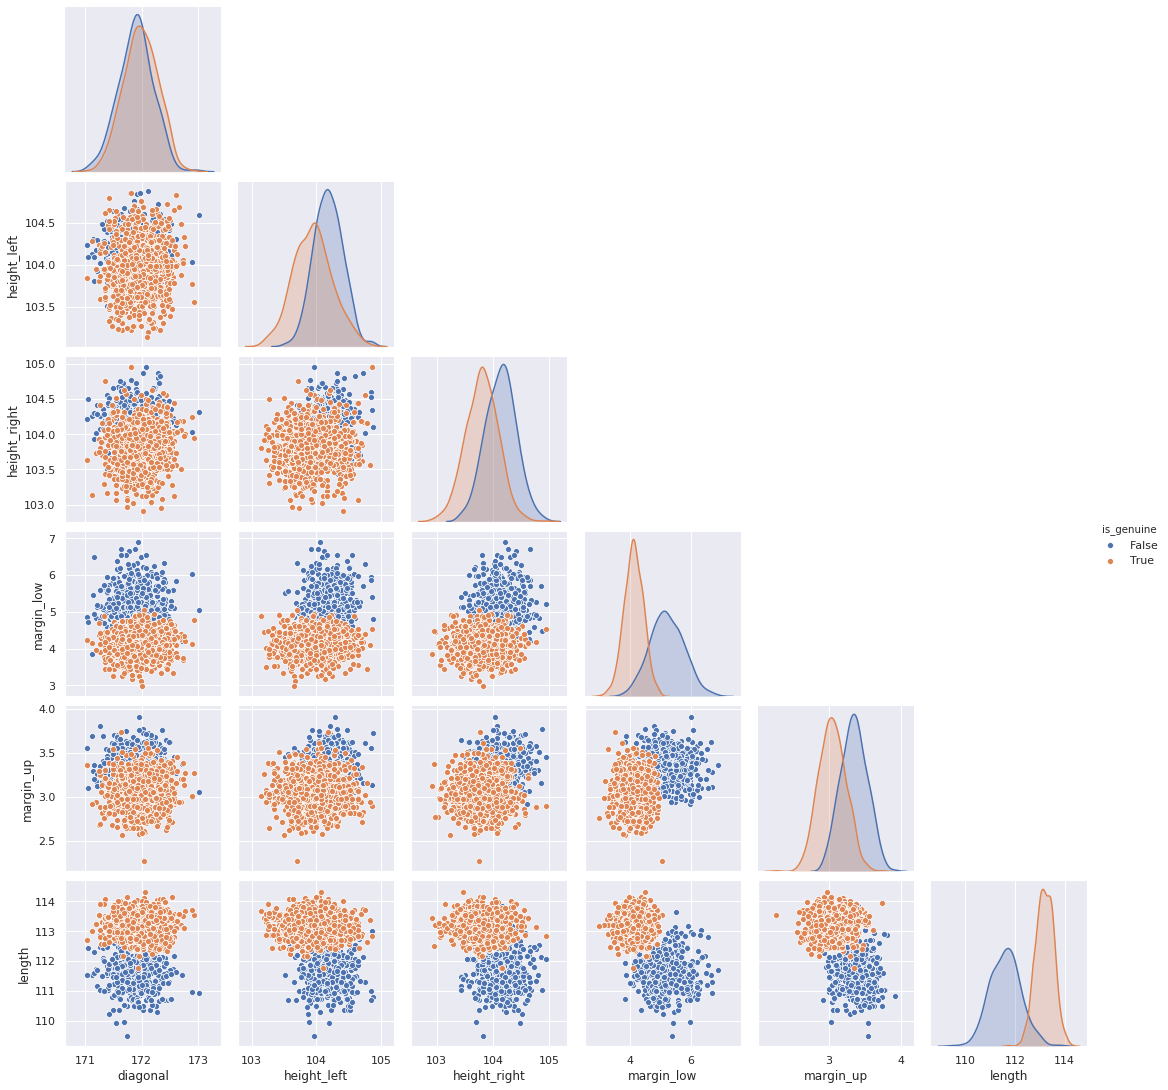

In [12]:
sns.set()
sns.pairplot(df, hue='is_genuine', corner=True)

-> Il ya une correlation linéaire entre les variables **lenght** et **margin_low**.

-> Ces deux variables(**lenght** et **margin_low**) ne suivent pas la loi normale 

On fait un heatmap pour  pour bien évaluer les correlations

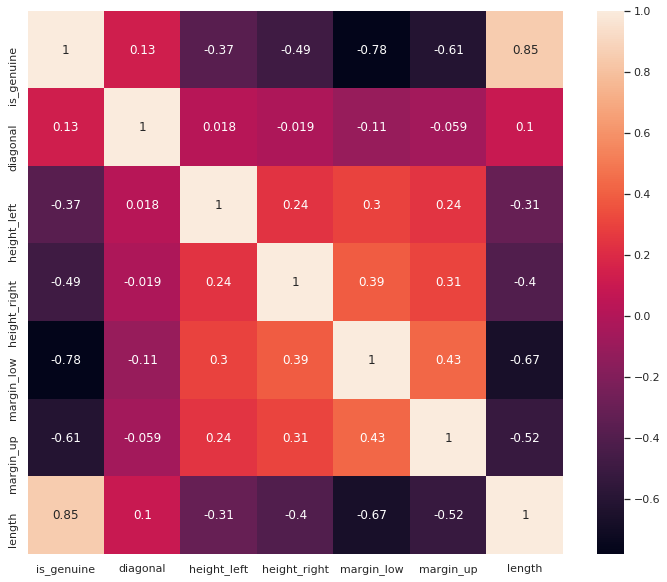

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

-> Cette corrélation linéaire est **négative (-0.67)**

Pour remplacer les valeurs manquantes, on va utiliser la **régression linéaire simple** à partir du machine learning.Cette droite de regression est sous la forme d'une équation: **y = b1 + b2X + Ɛ**. Et on va chercher à minimiser les erreurs de cette regression.  

#### **3- Création des variables X et y**  

**X** est la variable explicative ou regresseur qu'on nomme **feature** et **y** la variable expliqué ou **réponse** à notre demande sur scikit learn. 

In [14]:
df.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

In [15]:
# Créer le feature X
feature_col = ['length']
X = df[feature_col]

In [16]:
# Vérifier la taille 
X.shape

(1463, 1)

In [17]:
# Créer y la réponse 
y = df['margin_low']

In [18]:
# Vérifier la taille
y.shape

(1463,)

On fractionne de manière aléatoire le jeu de données en parties: 
- la prmière va permettre à l'algorithme d'apprendre et s'améliorer.  On nomme cela un **training set** 
- la seconde va tester le modèle.Et elle est appelée **test set**. 

#### **4- Splitting data: fractionnement des données** 

Le fractionnement se fait avec le module **train_test_split**. On obtient ainsi 4 variables: **X_train, y_train, X_test** et **y_test**

In [19]:
# Importer le module train_test_split de scikit learn
from sklearn.model_selection import train_test_split

# Assigner les variables à la sortie du module train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [20]:
# Verifier 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1170, 1)
(293, 1)
(1170,)
(293,)


On peut maintenant entrainer le modèle 

#### **5- Entrainement du modèle** 

In [21]:
# Importer le module LinearRegression de scikit learn
from sklearn.linear_model import LinearRegression 

# Instacier 
linreg = LinearRegression()

In [22]:
# Entrainer le modèle 
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

On va identifier les coefficients de la regression linéaire et les interpreter. 

#### **6- Intrepretation des coefficients** 

In [23]:
#Afficher y_intercept

print(linreg.intercept_)

# Afficher les coefficients de beta dans l'ordre de passage 
print(linreg.coef_)

62.02956437384286
[-0.51068004]


Appliquons maintenant le modèle sur le jeu de donnée **test**

#### **7- Application du modèle sur X_test et prédiction des valeurs sur X dans X_test**  

In [24]:
#Appliquer le modèle d'entrainement sur X_test
y_pred = linreg.predict(X_test)
print(y_pred)

[4.35846795 4.07248713 4.59848757 3.97035113 4.25633195 4.9763908
 4.18994354 5.20619681 4.12866194 4.95596359 4.38910875 5.22662401
 4.43506996 4.29718635 4.16440954 5.18576961 4.80275958 4.22569114
 4.90489559 4.11844834 4.21037074 5.022352   4.14398234 4.61380797
 4.15930274 4.26143875 4.12866194 4.12866194 4.47081756 5.18066281
 4.41974956 5.18576961 4.11844834 3.92949672 4.9866044  5.17555601
 3.98567153 4.87936159 4.51677876 4.20526394 4.44017676 4.35336115
 5.70666325 5.07342    5.022352   3.96524432 4.08780753 3.94481712
 5.0632064  4.49124476 4.05716673 5.33386682 5.20619681 4.34314755
 4.59848757 4.03673953 4.04184633 4.45039036 4.17972994 4.82318678
 5.0580996  4.05205993 5.24194441 4.21037074 4.09291433 4.62912837
 4.28697275 4.58316717 4.35846795 4.33804075 4.07759393 4.59338077
 4.27675915 4.21037074 5.36961442 4.76701198 4.9917112  4.27675915
 5.50749803 4.37889515 4.58316717 4.89978879 5.36961442 4.28697275
 5.32365322 4.32272035 4.41464276 4.06227353 5.32365322 3.96013

Le modèle ainsi appliqué sur X_test, on analyse l'erreur afin de mesurer les performances du modèle. 

#### **8- Evaluation du modèle de regression linéaire**

L'évaluer du modèle de regression linéaire consiste à calculer le **Mean Square Error (MSE)**. C'est la moyenne des erreurs des écarts entre les prévisions et les observations. Cette valeur doit être la plus minimale possible. 

In [25]:
# Afficher la métrique MSE
print(metrics.mean_squared_error(y_test, y_pred))

0.2628758498235987


-> La **MSE** est égale à **0.23**. Cette valeur est minimale donc on peut affirmer que notre modèle est performant.

L'équation de la droite est: **y = 62.50 - 0.51 X + 0.23** 

Construisons la droite de la regression linéaire 

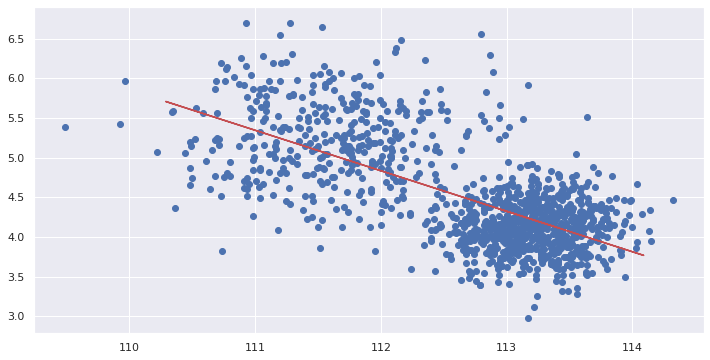

In [26]:
plt.figure(figsize=(12,6))
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color='r' )
plt.show()

On applique maintenant le modèle de la régression à notre jeu de données qui contient les valeurs manquantes. 

#### **9- Remplacement des valeurs manquantes à partir des valeurs prédites**  

In [27]:
# Créer le feature X_val du dataframe df_null
X_val = df_null[feature_col]
print(X_val.shape)

(37, 1)


In [28]:
#Remplacer les valeursmanquantes par les valeurs prédites
y_val = linreg.predict(X_val)
print(y_val)

[4.42996316 4.28186595 4.35846795 4.18483674 4.64955557 4.21037074
 4.17462314 4.13887554 4.34825435 4.34825435 4.33804075 3.81714711
 3.99077833 4.40442916 4.42996316 4.18483674 4.50145836 4.62402157
 4.28697275 4.11334154 3.5873411  4.14398234 4.00609873 4.18483674
 3.90396272 3.97545793 4.43506996 4.48613796 4.13376874 4.89978879
 4.63423517 5.19598321 5.23683761 4.68530318 5.69644965 5.1040608
 5.0938472 ]


On peut maintenant insérer **y_val** dans le dataframe df1

In [29]:
df_null.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36


In [30]:
# Inserer les valeurs prédites à la sortie de la réponse dans le dataframe df1
df_null.loc[df_null.margin_low.isnull(), 'margin_low']=y_val

/home/yeo/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [31]:
# Vérification et observation des 5 premières lignes 
df_null.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,4.429963,3.25,112.79
99,True,171.93,104.07,104.18,4.281866,3.14,113.08
151,True,172.07,103.80,104.38,4.358468,3.02,112.93
197,True,171.45,103.66,103.80,4.184837,3.62,113.27
241,True,171.83,104.14,104.06,4.649556,3.02,112.36


On fait une concaténation à partir des index de **df_null** et **df** pour ainsi obtenir le data frame complet. 

In [32]:
df_full = pd.concat([df, df_null], axis=0)

In [33]:
#Afficher les 5 premières lignes 
df_full.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [34]:
# Vérifier les informations de df_full
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1438
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 83.5 KB


On a maintenant un data frame complet sans des valeurs manquantes. 

On procède maintenant à un clustering 

#### **10- Clustering par l'algorithme du K-Means** 

In [35]:
#Indexer avec "is_genuine"
#df_full = df_full.set_index('is_genuine')

In [127]:
features = df_full.drop(['is_genuine'], axis=1)

In [128]:
# Convertir les données en numpy array: X
X = features.values
print(X.shape)

(1500, 6)


In [116]:
# Centrer-reduit pour normaliser les données 
sdt_scale = preprocessing.StandardScaler().fit(X)
X_scaled = sdt_scale.transform(X)
print(X_scaled.shape)

(1500, 6)


On determine le coeeficient de silhouettes pour le nombre de clusters choisi afin de ne par perdre les informations de nos données. 

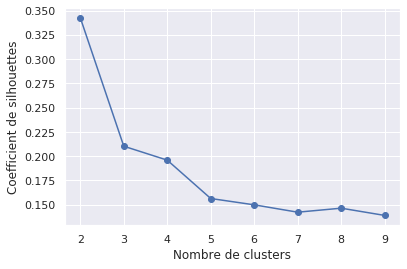

In [117]:
#Créer une liste de coefficients de silhouettes 
silhouettes = []

#Faire une boucle itérative de 2 à 10:
for num_clusters in range (2,10):
    cls = cluster.KMeans(n_clusters = num_clusters)
    cls.fit(X_scaled)

#Calcul de la métrique silhouettes
    silh = metrics.silhouette_score(X_scaled, cls.labels_)
    silhouettes.append(silh)

#Représentation graphique du coeeficient de silhouettes 
plt.plot(range(2,10), silhouettes, marker="o")
plt.xlabel("Nombre de clusters")
plt.ylabel("Coefficient de silhouettes")
plt.show()

-> Le coefficient de silhouettes baisse puis augment à **k=4**

Determinons l'inertie pour plus de précision

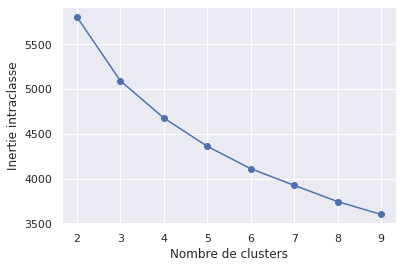

In [118]:
#créer une liste d'inerties
inerties = []

#Créer une boucle itérative de 2 à 10
for k in range (2,10):
    km = cluster.KMeans(n_clusters = k)
    km.fit(X_scaled)
    
#Calcul de l'inertie
    inerties.append(km.inertia_)

#Représentation graphique 
plt.plot(range(2,10), inerties, marker="o")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie intraclasse")
plt.show()

L'inertie interclasse baisse à partir de **K=2** qui est le nombre idéal de clusters. 

Cependant avec la méthode du coude, on peut utiliser **K=3** clusters pour conserver l'intégrité des informations de nos données.    

Ainsi, on va comparer les 2 clustering pour **k=2** et **k=3**

#### **Calcul du nombre de clusters** 

In [119]:
#Calcul de clusters pour k=2
cls2 = cluster.KMeans(n_clusters = 2)
cls2.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Pour voir à quoi correspond les clusters on fait une ACP pour projeter les indvidus sur 3 dimensions.

#### **ACP et projection des données de l'échantillon**

In [121]:
#Calcul de l'ACP
pca = decomposition.PCA()
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Déterminons maintenant le pourcentage de variances expliquées.

In [122]:
# Determiner le pourcentage de variances expmliquées
print(pca.explained_variance_ratio_.cumsum())

[0.43224179 0.60180264 0.73209678 0.85045506 0.94710546 1.        ]


-> Sur le premier plan factoriel (**F1 et F2**), on a **60% d'informations** sur nos données qui sont conservées.

Pour confirmer cela on fait **l'Eboulis des valeurs propres**

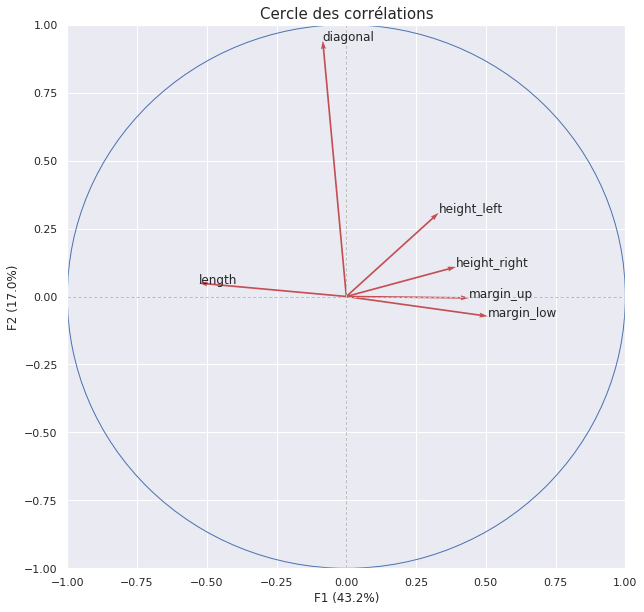

In [65]:
# Coordonnées des composantes principales
pcs = pca.components_

# Afficher sur un cercle la contribribution de chacune des variables initiales selon ses composantes principales
figure = plt.subplots(figsize=(10,10))
plt.xlim(-1,1)
plt.ylim(-1,1)

plt.quiver(np.zeros(pcs.shape[1]),np.zeros(pcs.shape[1]),
          pcs[0,:], pcs[1,:],
          angles='xy', scale_units='xy', scale=1, color='r', width= 0.003)

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.text(x, y, df_full.columns[i])
    
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

#Ajout des axes
plt.plot([-1,1],[0,0],color='silver',linestyle='--',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='--',linewidth=1)

plt.title('Cercle des corrélations', fontsize=15)
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))

plt.show()

- La variable *diagonal* contribue fortement et positivement à l'axe F2
- Les variables *margin_up et margin_low* contribuent le plus et positivement à l'axe F1
- Les variables *height_left et height_right* contribuent positement à l'axe F1
- La variable *lenght* contibue ngativement à l'axe F1

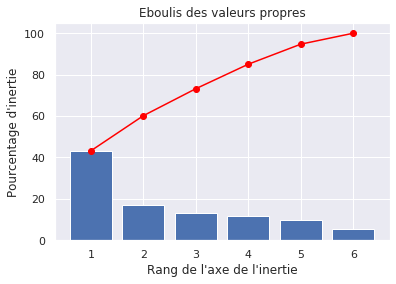

In [123]:
#Représentation graphique de la variance expliquée
pca = decomposition.PCA()
pca.fit(X_scaled)
scree = pca.explained_variance_ratio_*100

plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(), c='red', marker='o')

plt.xlabel("Rang de l'axe de l'inertie")
plt.ylabel("Pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show()

-> Les résultats sont conformes à ceux de la variance expliquée.

On fait une visualisation pour mettre en exergue ces variances expliquées. 

Pour cela on fait une projection sur le premier plan factoriel. 

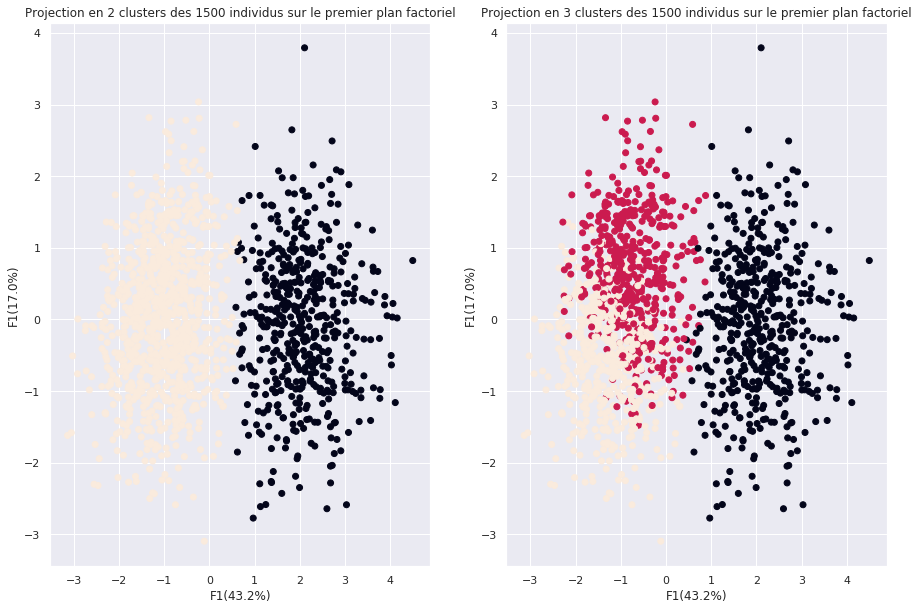

In [124]:
#Projecter les données sur le plan factoriel
X_projected = pca.transform (X_scaled)
plt.figure(figsize=(15,10))

plt.subplot(121)
plt.scatter(X_projected[:,0],X_projected[:,1], c=cls2.labels_)
plt.xlabel("F{}({}%)".format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel("F{}({}%)".format(1, round(100*pca.explained_variance_ratio_[1],1)))
plt.title("Projection en 2 clusters des {} individus sur le premier plan factoriel".format(X_projected.shape[0]))

plt.subplot(122)
plt.scatter(X_projected[:,0], X_projected[:,1], c=cls3.labels_)
plt.xlabel("F{}({}%)".format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel("F{}({}%)".format(1, round(100*pca.explained_variance_ratio_[1],1)))
plt.title("Projection en 3 clusters des {} individus sur le premier plan factoriel".format(X_projected.shape[0]))

plt.show()

-> On remarque que pour **k=2** la séparation est parfaite. De même pour **k=3** on a une bonne séparation. 

#### **Calcul des centroides** 

**Pour k=2**

In [125]:
# Calcul des centroides 
centroids_2 = cls2.cluster_centers_
print(centroids_2)

[[-0.19432338  0.57071311  0.71336493  1.11666926  0.86417597 -1.20083284]
 [ 0.09600039 -0.28194592 -0.35241933 -0.55166131 -0.42692359  0.59324013]]


In [130]:
#Inserer les centroides des clusters dans le dataframe
df_centroids = pd.DataFrame(centroids_2, columns=features.columns)
df_centroids

,diagonal,height_left,height_right,margin_low,margin_up,length
0,-0.194323,0.570713,0.713365,1.116669,0.864176,-1.200833
1,0.096000,-0.281946,-0.352419,-0.551661,-0.426924,0.593240


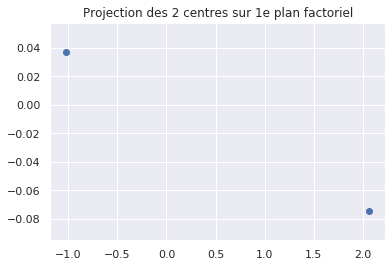

In [148]:
# Données projetées  
centroids_projected_2 = pca.transform(centroids_2)

plt.scatter(centroids_projected_2[:,0],centroids_projected_2[:,1])
plt.title("Projection des {} centres sur 1e plan factoriel".format(len(centroids_2)))
#plt.savefig("Graphic/P9_08_kmeans_centroids.png")
plt.show()

In [131]:
#Indexer par tri de clusters les centroides
idk_2 = np.argsort(cls2.labels_)

In [137]:
df_full.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [139]:
df_full.set_index('is_genuine', inplace=True)

In [143]:
# Attribuer les clusters dans le dataframe "df_full"
df_cls2 = pd.DataFrame(df_full.index[idk_2], cls2.labels_[idk_2]).reset_index()
#Renommer la colonne
df_cls2.columns = ['cluster', 'is_genuine']

In [144]:
# Observer les 5 premières lignes
df_cls2.head()

,cluster,is_genuine
0,0,True
1,0,False
2,0,False
3,0,False
4,0,False


#### **Table de contingence** 

In [145]:
pd.crosstab(df_cls2['cluster'],df_cls2['is_genuine'])

is_genuine,False,True
cluster,,
0,486,10
1,14,990


In [146]:
# Calcul de la probabilité pour que le billet soit vrai. 
accuracy = (990+486)/1500
accuracy

0.984

-> On a une probabilité de 0.98 qui est supérieure à 0.5. Donc le billet est considéré comme vrai. 

**Pour k=3**

In [149]:
#Calcul de clusters pour k=3
cls3 = cluster.KMeans(n_clusters=3)
cls3.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [150]:
# Calcul des centroides
centroids_3 = cls3.cluster_centers_
print(centroids_3)

[[-0.2017571   0.56121931  0.71544334  1.13675736  0.87331822 -1.21815104]
 [ 0.51035321  0.43601283 -0.18188357 -0.56150124 -0.34750909  0.59876298]
 [-0.32070044 -0.98569693 -0.51005489 -0.53465897 -0.49562061  0.57591919]]


In [151]:
#Inserer les centroides des clusters dans le dataframe
pd.DataFrame(centroids_3, columns=df_full.columns)

,diagonal,height_left,height_right,margin_low,margin_up,length
0,-0.201757,0.561219,0.715443,1.136757,0.873318,-1.218151
1,0.510353,0.436013,-0.181884,-0.561501,-0.347509,0.598763
2,-0.320700,-0.985697,-0.510055,-0.534659,-0.495621,0.575919


In [152]:
#Indexer par tri de clusters les centroides
idk_3 = np.argsort(cls3.labels_)

In [153]:
# Attribuer les clusters dans le dataframe "df_full"
df_cls3 = pd.DataFrame(df_full.index[idk_3], cls3.labels_[idk_3]).reset_index()
df_cls3.columns = ['cluster','is_genuine']

In [154]:
# Observer les 5 premières lignes
df_cls3.head()

,cluster,is_genuine
0,0,True
1,0,False
2,0,False
3,0,False
4,0,False


In [155]:
# Tableau de contingence de **df_cls3**
pd.crosstab(df_cls3['cluster'],df_cls3['is_genuine'])

is_genuine,False,True
cluster,,
0,485,4
1,11,498
2,4,498


-> On observe que les clusters **1 & 2** ont le même nombre de billets vrai. Donc on choisi le K=2 pour la suite de nos analyses. 

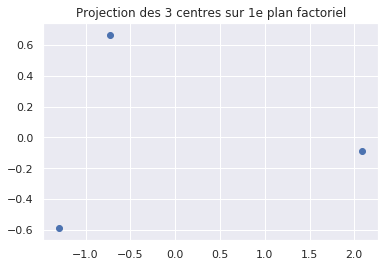

In [156]:
# Données projetées  
centroids_projected_3 = pca.transform(centroids_3)

plt.scatter(centroids_projected_3[:,0],centroids_projected_3[:,1])
plt.title("Projection des {} centres sur 1e plan factoriel".format(len(centroids_3)))
#plt.savefig("Graphic/P9_08_kmeans_centroids.png")
plt.show()

### **La Regression Logistique Classique**  

Modélisez les données à l'aide d'une régression logistique. Grâce à celle-ci, vous créerez un programme capable d'effectuer une prédiction sur un billet, c'est-à-dire de déterminer s'il s'agit d'un vrai ou d'un faux billet. Pour chaque billet, votre algorithme de classification devra donner la probabilité que le billet soit vrai. Si cette probabilité est supérieure ou égale à 0.5, le billet sera considéré comme vrai. Dans le cas contraire, il sera considéré comme faux.

In [69]:
df_full.reset_index(inplace=True)

In [70]:
df_full.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [72]:
# Création des variables X et y
y = df_full['is_genuine']
X = df_full.drop('is_genuine', axis=1)

In [73]:
# Assigner les variables à la sortie du module train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [74]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1200, 6)
(300, 6)
(1200,)
(300,)


In [157]:
#instanciation
lrSk = LogisticRegression()

#lancement des calculs
lrSk.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [158]:
#affichage des coefficients
print(pd.DataFrame({"var":X_train.columns,"coef":lrSk.coef_[0]}))

            var      coef
0      diagonal  0.043642
1   height_left -1.843616
2  height_right -2.125003
3    margin_low -3.639712
4     margin_up -2.924881
5        length  3.836654


In [159]:
#la constante
print(lrSk.intercept_)

[-0.02204504]


In [162]:
#Application du modèle sur X_test et prédiction des valeurs sur X dans X_test
y_pred = lrSk.predict(X_test)
y_pred

array([ True,  True, False, False,  True, False,  True,  True, False,
       False,  True, False,  True,  True, False,  True, False,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
       False, False,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False, False,  True,  True, False,  True,  True,
        True,  True, False,  True,  True,  True, False, False,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True, False, False,  True,  True,  True,  True,  True, False,
        True,  True, False,  True, False, False,  True, False, False,
        True, False,

In [164]:
# Evaluer le modèle
score = accuracy_score(y_pred, y_test)
score

0.9833333333333333

-> Le score est 98.3%. Notre modèle est robuste

In [180]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97        99
        True       0.99      0.99      0.99       201

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



In [167]:
# Calcul de la probabilité
y_proba = lrSk.predict_proba(X_test)[:,1]
y_proba

array([9.98977658e-01, 9.42626703e-01, 2.00362851e-04, 1.36989455e-03,
       9.97179029e-01, 3.39214826e-04, 9.88762948e-01, 9.96069774e-01,
       1.53657846e-04, 1.44890491e-04, 9.90294927e-01, 8.74239744e-07,
       9.64885561e-01, 9.98819745e-01, 2.93337137e-01, 9.98548356e-01,
       1.77721656e-02, 9.99135465e-01, 9.89742468e-01, 9.96457241e-01,
       7.15399017e-04, 9.71886284e-01, 2.89815498e-06, 9.82478247e-01,
       9.98278538e-01, 9.99310246e-01, 3.75552214e-03, 1.61873064e-03,
       1.98494645e-03, 9.88341439e-01, 9.80129353e-01, 9.95455685e-01,
       3.83623780e-01, 9.67007101e-01, 9.99897032e-01, 9.99524052e-01,
       9.99451284e-01, 6.37862719e-02, 9.51019637e-01, 9.99731590e-01,
       9.86767474e-01, 9.99531084e-01, 9.61731434e-01, 9.99171273e-01,
       9.99929413e-01, 9.99637500e-01, 3.39268307e-05, 9.91290643e-01,
       9.73242130e-01, 9.90172030e-01, 9.99842919e-01, 9.99817780e-01,
       9.98893391e-01, 9.87680374e-01, 3.34255249e-04, 9.86385525e-01,
      

In [184]:
#matrice de confusion
print(metrics.confusion_matrix(y_test,y_pred))

[[ 97   3]
 [  2 198]]


### Utillisation : Script de l'algorithme sur un nouveau jeu de données

In [168]:
#Charger le dataframe
billets_test = pd.read_csv('billets_production.csv')

In [169]:
#Observer le Dataframe
billets_test

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [171]:
# Supprimer la variable "id"
X_verifier = billets_test.drop('id', axis=1)
X_verifier

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.76,104.01,103.54,5.21,3.30,111.42
1,171.87,104.17,104.13,6.00,3.31,112.09
2,172.00,104.58,104.29,4.99,3.39,111.57
3,172.49,104.55,104.34,4.44,3.03,113.20
4,171.65,103.63,103.56,3.77,3.16,113.33


In [173]:
# Application du modèle et prédiction des valeurs
y_verifier = lrSk.predict(X_verifier)
y_verifier

array([False, False, False,  True,  True])

In [175]:
#Calculer la probabilité 
y_verifier_p = lrSk.predict_proba(X_verifier)[:,1]
y_verifier_p

array([4.32775004e-03, 6.64133703e-04, 9.48657043e-04, 9.10477054e-01,
       9.99723654e-01])

In [176]:
# INserer dans le Dataframe
billets_test['is_genuine'] = y_verifier
billets_test['is_genuine_proba'] = y_verifier_p

In [177]:
#Observer 
billets_test

,diagonal,height_left,height_right,margin_low,margin_up,length,id,is_genuine,is_genuine_proba
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,False,0.004328
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,False,0.000664
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,False,0.000949
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,True,0.910477
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,True,0.999724


In [185]:
#Enregistrer le DataFrame
billets_test.to_csv('Yeo_Kadjowely_02_application_finale_25032022.csv')